In [1]:
import glob
from pathlib import Path
import os
import numpy as np
import scipy
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
import SimpleITK as sitk

In [2]:
PATH = '//Users/mona/Library/CloudStorage/Dropbox/0.MAC-SYNC/0.PROJECT/DCE/Data/QuantitativePerfusionStudy_results/MR_2024-05-24_0741-7954-8413-0106_raw/DCE/S182'


In [3]:
plt.rcParams['font.size'] = 16
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.style'] = 'normal'
cmap = mpl.cm.get_cmap("CMRmap").copy()
cmap.set_bad(color='black')

def plot_DCE_results(name, mask, PS, Ve, Vp, Flow, rmse, Rssq, figsize=(30, 30)):
    fig, axes = plt.subplots(1, 6, figsize=figsize)
    plt.title(name)
    up = 95
    low = 5
    bound = np.percentile(PS[mask==1], [low, up])
    PS = np.ma.masked_where(mask == 0, PS)
    avg, std = np.mean(PS[mask==1]), np.std(PS[mask==1])
    im0 = axes[0].imshow(PS, cmap=cmap, vmin=bound[0], vmax=bound[1])
    axes[0].set_title(f"PS [{bound[0]:.3f}, {bound[1]:.3f}], mean: {avg:.3f}, std: {std:.3f}")
    axes[0].axis('off')
    ax0_divider = make_axes_locatable(axes[0])
    cax0 = ax0_divider.append_axes("right", size="7%", pad="2%")
    cb0 = fig.colorbar(im0, cax=cax0)

    bound = np.percentile(Ve[mask==1], [low, up])
    Ve = np.ma.masked_where(mask == 0, Ve)
    avg, std = np.mean(Ve[mask==1]), np.std(Ve[mask==1])
    im1 = axes[1].imshow(Ve, cmap=cmap, vmin=bound[0], vmax=bound[1])
    axes[1].set_title(f"Ve [{bound[0]:.3f}, {bound[1]:.3f}], mean: {avg:.3f}, std: {std:.3f}")
    axes[1].axis('off')
    ax1_divider = make_axes_locatable(axes[1])
    cax1 = ax1_divider.append_axes("right", size="7%", pad="2%")
    cb1 = fig.colorbar(im1, cax=cax1)

    bound = np.percentile(Vp[mask==1], [low, up])
    Vp = np.ma.masked_where(mask == 0, Vp)
    avg, std = np.mean(Vp[mask==1]), np.std(Vp[mask==1])
    im2 = axes[2].imshow(Vp, cmap=cmap, vmin=bound[0], vmax=bound[1])
    axes[2].set_title(f"Vp [{bound[0]:.3f}, {bound[1]:.3f}], mean: {avg:.3f}, std: {std:.3f}")
    axes[2].axis('off')
    ax2_divider = make_axes_locatable(axes[2])
    cax2 = ax2_divider.append_axes("right", size="7%", pad="2%")
    cb2 = fig.colorbar(im2, cax=cax2)

    bound = np.percentile(Flow[mask==1], [low, up])
    Flow = np.ma.masked_where(mask == 0, Flow)
    avg, std = np.mean(Flow[mask==1]), np.std(Flow[mask==1])
    im3 = axes[3].imshow(Flow, cmap=cmap, vmin=bound[0], vmax=bound[1])
    axes[3].set_title(f"Flow [{bound[0]:.3f}, {bound[1]:.3f}], mean: {avg:.3f}, std: {std:.3f}")
    axes[3].axis('off')
    ax3_divider = make_axes_locatable(axes[3])
    cax3 = ax3_divider.append_axes("right", size="7%", pad="2%")
    cb3 = fig.colorbar(im3, cax=cax3)

    bound = np.percentile(Rssq[mask==1], [low, up])
    avg, std = np.mean(Rssq[mask==1]), np.std(Rssq[mask==1])
    im4 = axes[4].imshow(Rssq, cmap='jet', vmin=0, vmax=1)
    axes[4].set_title(f"R2 [{bound[0]:.3f}, {bound[1]:.3f}], mean: {avg:.3f}, std: {std:.3f}")
    axes[4].axis('off')
    ax4_divider = make_axes_locatable(axes[4])
    cax4 = ax4_divider.append_axes("right", size="7%", pad="2%")
    cb4 = fig.colorbar(im4, cax=cax4)

    bound = np.percentile(rmse[mask==1], [low, up])
    avg, std = np.mean(rmse[mask==1]), np.std(rmse[mask==1])
    im5 = axes[5].imshow(rmse, cmap='jet', vmin=bound[0], vmax=bound[1])
    axes[5].set_title(f"RMSE [{bound[0]:.3f}, {bound[1]:.3f}], mean: {avg:.3f}, std: {std:.3f}")
    axes[5].axis('off')
    ax5_divider = make_axes_locatable(axes[5])
    cax5 = ax5_divider.append_axes("right", size="7%", pad="2%")
    cb5 = fig.colorbar(im5, cax=cax5)
    return fig


In [4]:
ROI = scipy.io.loadmat(os.path.join(PATH, 'MASK', 'S182_ROI.mat'))
heart_mask = ROI['HeartMask'].T
Myomask = ROI['Myomask'].T

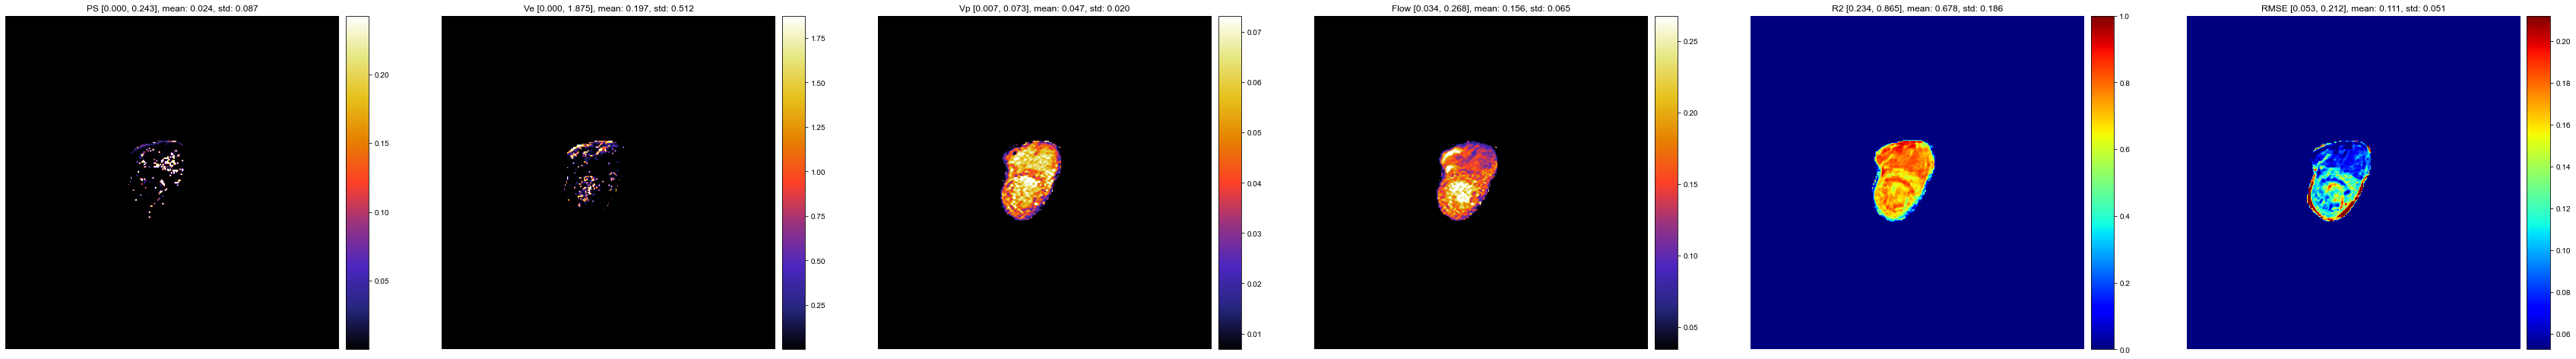

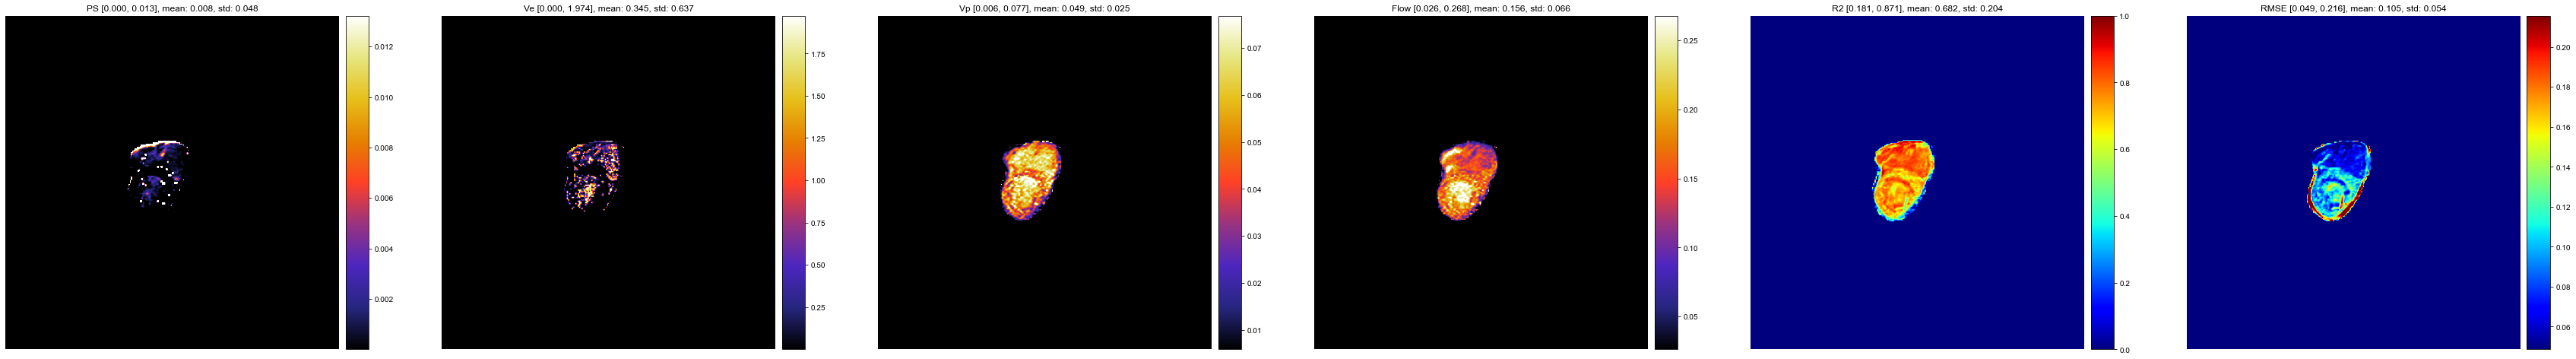

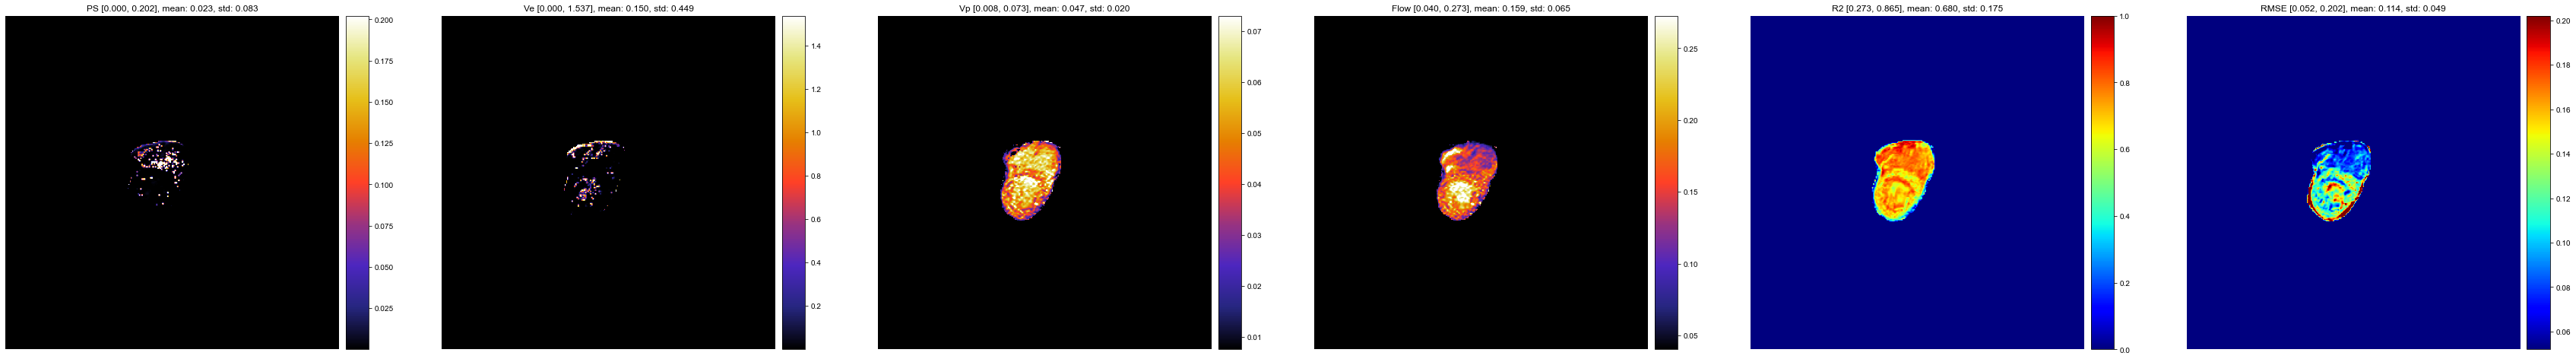

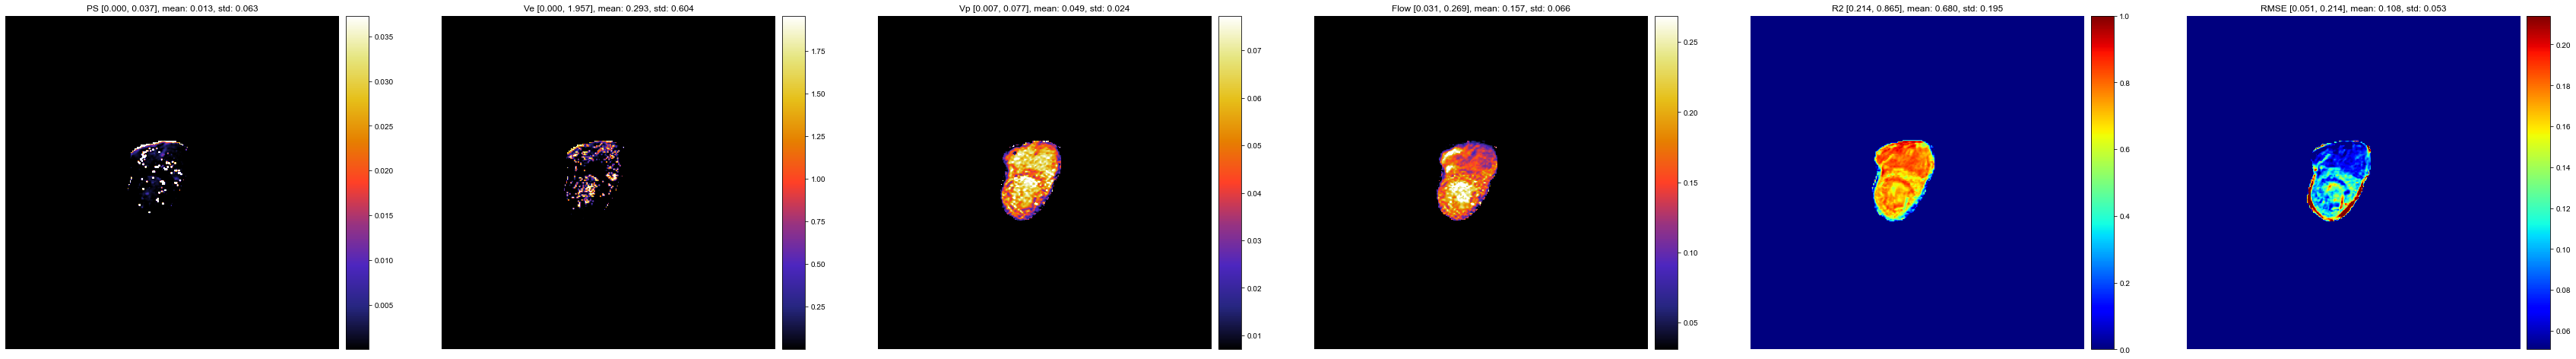

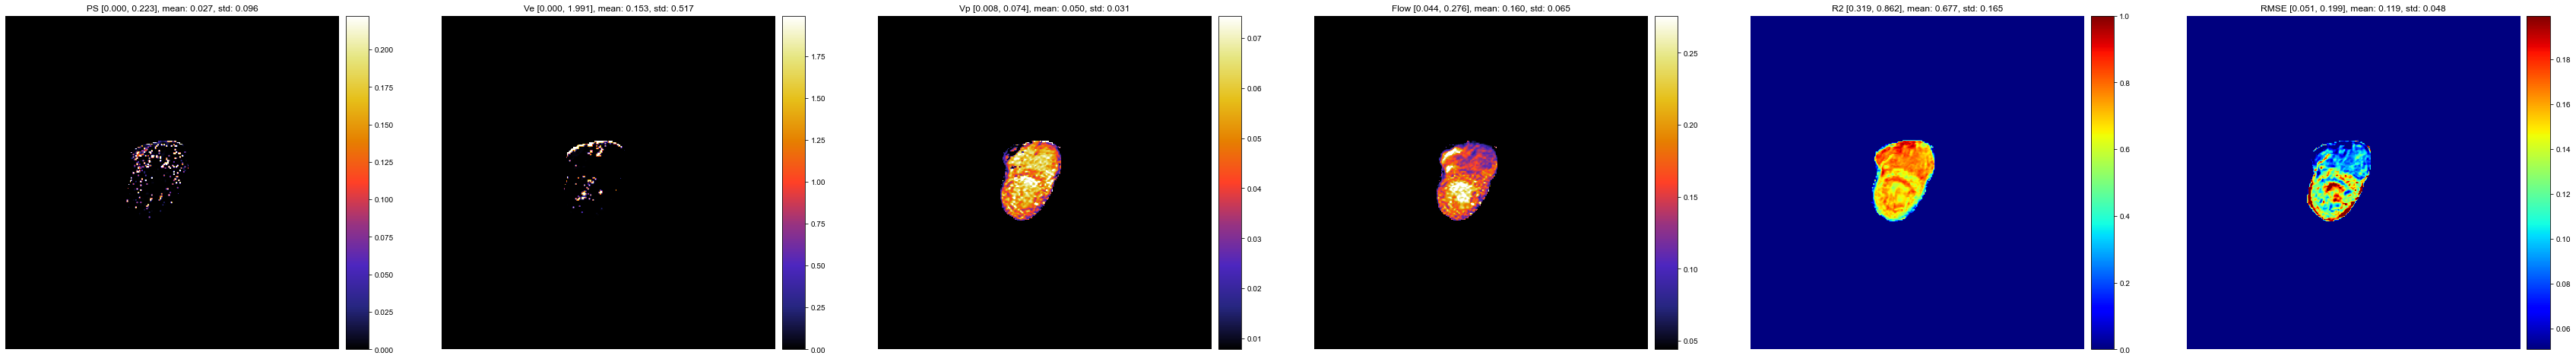

In [6]:
import scipy.io as sio
RESUTLS_folder = glob.glob(os.path.join(PATH, 't_0_*sec'))
for RESULTS in RESUTLS_folder:
    name = Path(RESULTS).name
    PS = sitk.GetArrayFromImage(sitk.ReadImage(os.path.join(RESULTS, 'PS.nii')))
    Rssq = sitk.GetArrayFromImage(sitk.ReadImage(os.path.join(RESULTS, 'Rssq.nii')))
    Ve = sitk.GetArrayFromImage(sitk.ReadImage(os.path.join(RESULTS, 've.nii')))
    Vp = sitk.GetArrayFromImage(sitk.ReadImage(os.path.join(RESULTS, 'vp.nii')))
    Flow = sitk.GetArrayFromImage(sitk.ReadImage(os.path.join(RESULTS, 'Flow.nii')))
    Rmse = sitk.GetArrayFromImage(sitk.ReadImage(os.path.join(RESULTS, 'Rmse.nii')))
    fig = plot_DCE_results(name, heart_mask, PS, Ve, Vp, Flow, Rmse, Rssq, figsize=(60, 10))
    fig.savefig(os.path.join(PATH, f'{name}_heartmask_DCE_results.png'), dpi=300)
    # fig.clf()